In [1]:
import pandas as pd
import numpy as np
# import re
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("synthetic-lux-pop-dataset-1000.csv", sep=";")
df = df.copy()

In [4]:
df

,Unnamed: 0,Gender,Age,Date_of_birth,Nationality,Municipality,Canton,Salary,Social_matricule,Ethnicity,hair_color,hair_lenght,First_name,Surname
0,0,M,43,19801104,Luxembourg,Schuttrange,Canton Luxembourg,26044.0,198011040281*,white,gray,medium,Mathias,Smits
1,1,F,38,19850810,Belgium,Luxembourg,Canton Luxembourg,2960.0,198508105283*,white,black,long,Martine,Heymans
2,2,M,33,19901221,Luxembourg,Pétange,Canton Esch,6528.0,199012215224*,white,brown,short,Robert,Vercruysse
3,3,F,27,19960504,France,Ettelbruck,Canton Diekirch,4862.0,199605042593*,white,black,short,Denise,Bonneau
4,4,F,79,19440822,Luxembourg,Steinsel,Canton Luxembourg,0.0,194408220883*,white,gray,long,Georgette,Étienne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,F,36,19870607,Luxembourg,Sandweiler,Canton Luxembourg,8083.0,198706077591*,latino,black,long,Antoinette,Verstraeten
996,996,F,31,19921005,Luxembourg,Wiltz,Canton Wiltz,3333.0,199210051210*,white,black,long,Adrienne,Neyens
997,997,F,65,19580525,Luxembourg,Erpeldange-sur-Sûre,Canton Diekirch,0.0,195805253050*,latino,brown,short,Ann,Weber
998,998,F,67,19560505,Luxembourg,Luxembourg,Canton Luxembourg,0.0,195605055667*,latino,gray,short,Barbara,Lopes


In [5]:
data = df.drop(["Date_of_birth", "Social_matricule", "hair_color", "hair_lenght", "First_name", "Unnamed: 0"], axis=1)

In [6]:
data

,Gender,Age,Nationality,Municipality,Canton,Salary,Ethnicity,Surname
0,M,43,Luxembourg,Schuttrange,Canton Luxembourg,26044.0,white,Smits
1,F,38,Belgium,Luxembourg,Canton Luxembourg,2960.0,white,Heymans
2,M,33,Luxembourg,Pétange,Canton Esch,6528.0,white,Vercruysse
3,F,27,France,Ettelbruck,Canton Diekirch,4862.0,white,Bonneau
4,F,79,Luxembourg,Steinsel,Canton Luxembourg,0.0,white,Étienne
...,...,...,...,...,...,...,...,...
995,F,36,Luxembourg,Sandweiler,Canton Luxembourg,8083.0,latino,Verstraeten
996,F,31,Luxembourg,Wiltz,Canton Wiltz,3333.0,white,Neyens
997,F,65,Luxembourg,Erpeldange-sur-Sûre,Canton Diekirch,0.0,latino,Weber
998,F,67,Luxembourg,Luxembourg,Canton Luxembourg,0.0,latino,Lopes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   Nationality   1000 non-null   object
 3   Municipality  1000 non-null   object
 4   Canton        1000 non-null   object
 5   Salary        1000 non-null   object
 6   Ethnicity     1000 non-null   object
 7   Surname       1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [8]:
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

In [10]:
over_65_data = data[data['Age'] > 65]
over_65_data

,Gender,Age,Nationality,Municipality,Canton,Salary,Ethnicity,Surname
4,F,79,Luxembourg,Steinsel,Canton Luxembourg,0.0,white,Étienne
8,M,69,Portugal,Differdange,Canton Esch,0.0,white,Esteves
9,M,67,Portugal,Bertrange,Canton Luxembourg,0.0,white,Tavares
13,F,89,Portugal,Schieren,Canton Diekirch,0.0,white,Garcia
15,M,75,Luxembourg,Pétange,Canton Esch,0.0,white,Nicolas
...,...,...,...,...,...,...,...,...
982,F,72,Luxembourg,Junglinster,Canton Grevenmacher,0.0,white,Couturier
985,F,90,Luxembourg,Weiler-la-Tour,Canton Luxembourg,0.0,white,Julien
991,M,76,Poland,Luxembourg,Canton Luxembourg,0.0,white,Osipiuk
992,F,66,Portugal,Differdange,Canton Esch,0.0,white,Ramos


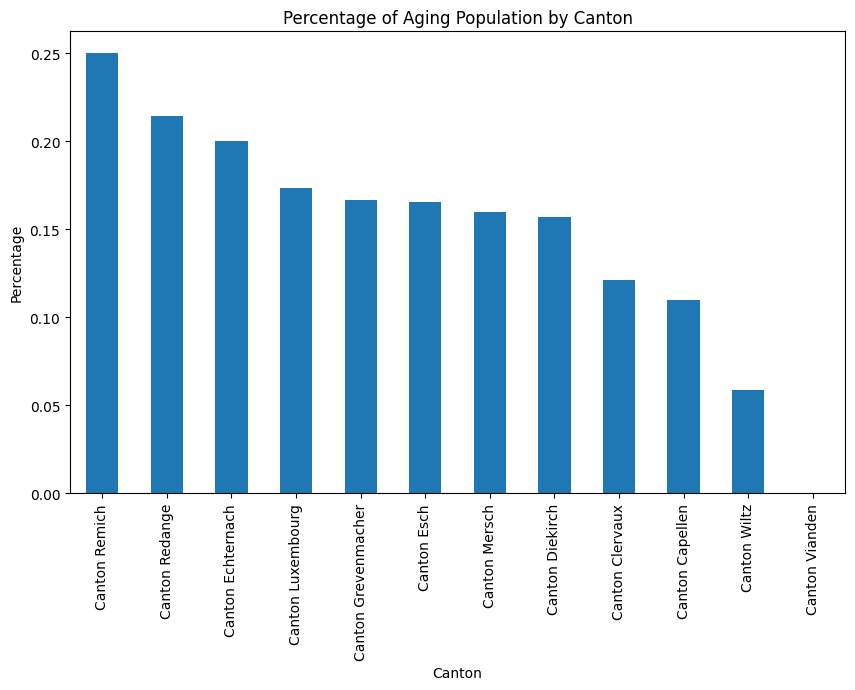

In [11]:
# 1. Proportion of aging population
aging_population = data[data['Age'] > 65].groupby('Canton').size() / data.groupby('Canton').size()
aging_population.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
aging_population.plot(kind='bar')
plt.title('Percentage of Aging Population by Canton')
plt.ylabel('Percentage')
plt.xlabel('Canton')
plt.show()

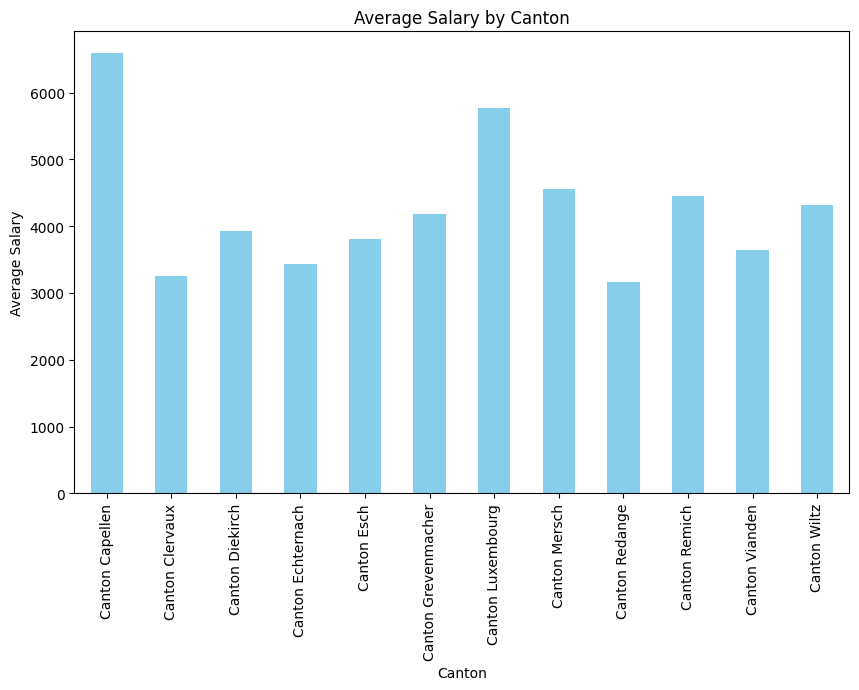

In [12]:
# 2. Average salary for each canton
average_salary = data.groupby('Canton')['Salary'].mean()
plt.figure(figsize=(10, 6))
average_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Canton')
plt.ylabel('Average Salary')
plt.xlabel('Canton')
plt.show()

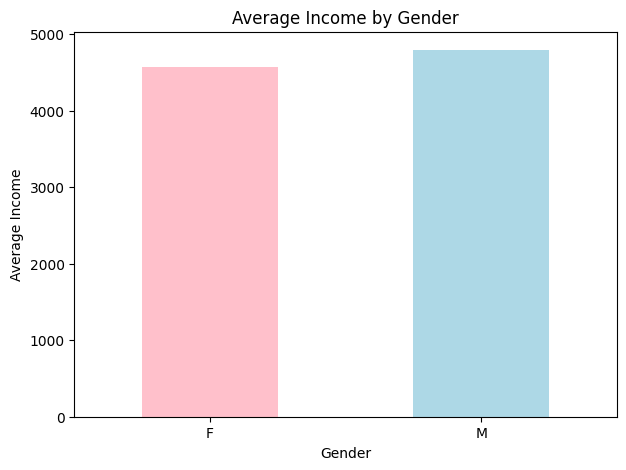

In [13]:
# 3. Difference in income between men and women
gender_income = data.groupby('Gender')['Salary'].mean()
plt.figure(figsize=(7, 5))
gender_income.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Average Income by Gender')
plt.ylabel('Average Income')
plt.xticks(rotation=0)
plt.show()

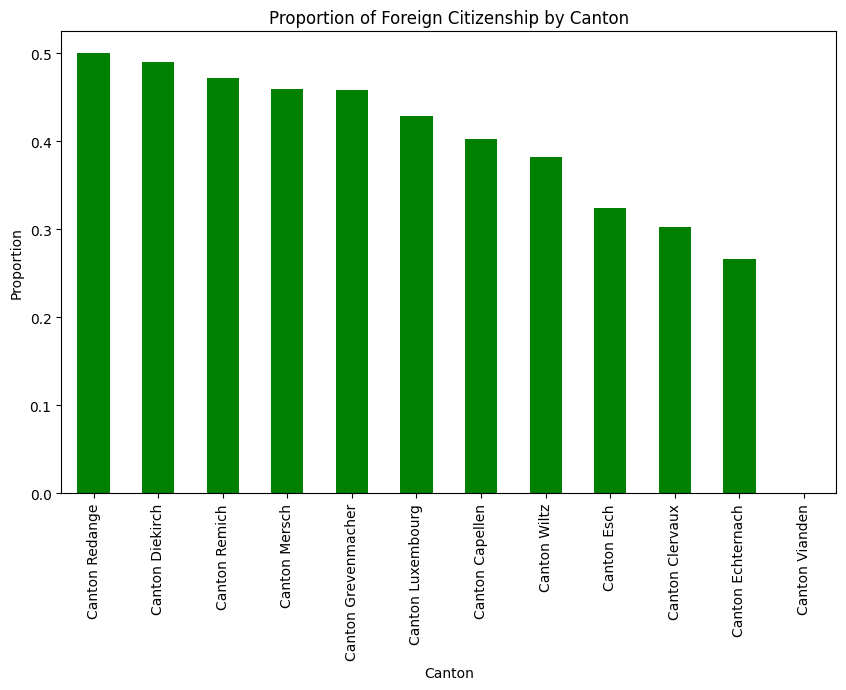

In [15]:
# 4. Proportion of Foreign Citizenship by Canton
foreign_citizenship = data[data['Nationality'] != 'Luxembourg'].groupby('Canton').size() / data.groupby('Canton').size()
foreign_citizenship.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
foreign_citizenship.plot(kind='bar', color='green')
plt.title('Proportion of Foreign Citizenship by Canton')
plt.ylabel('Proportion')
plt.xlabel('Canton')
plt.show()

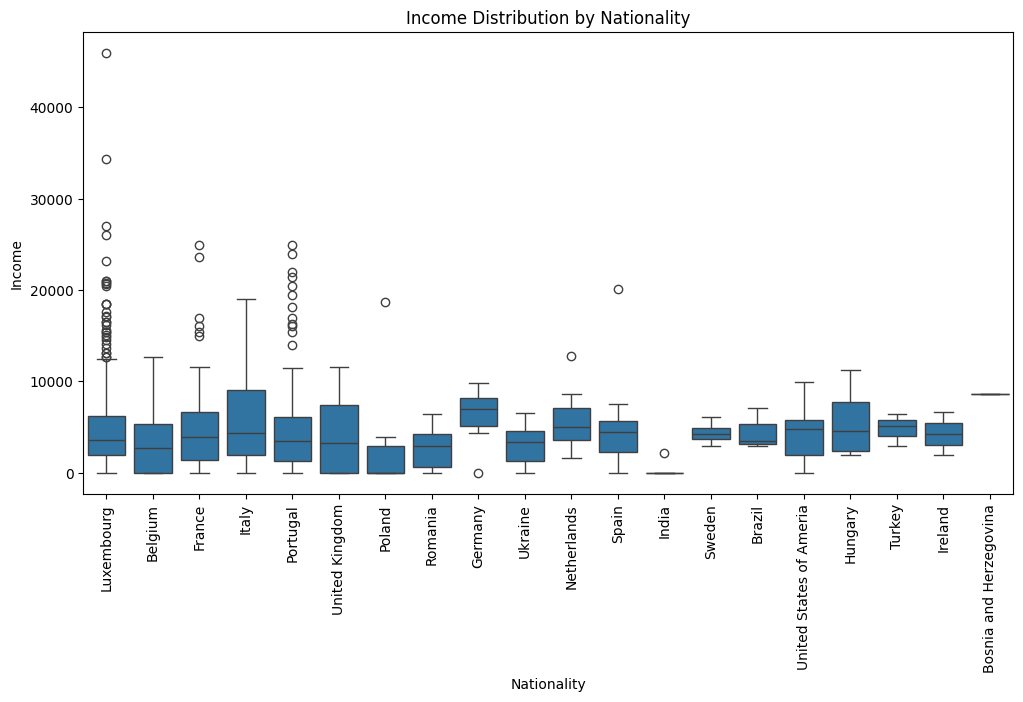

In [17]:
# 5. Income Distribution by Nationality
# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Nationality', y='Salary', data=data)

# Improve plot aesthetics
plt.xticks(rotation=90)
plt.title('Income Distribution by Nationality')
plt.ylabel('Income')
plt.xlabel('Nationality')

plt.show()

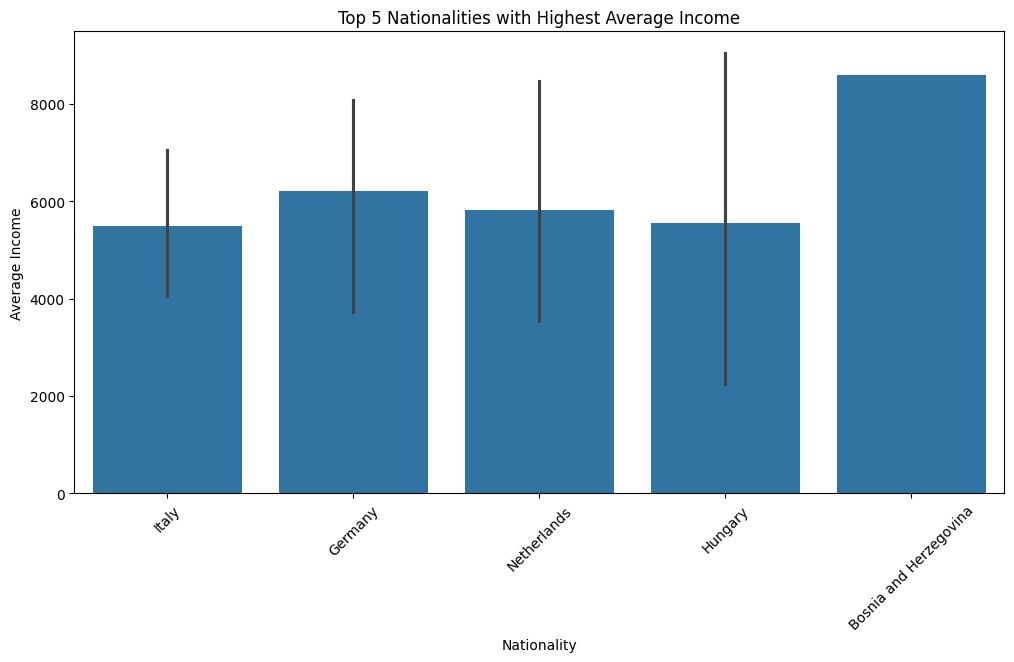

In [18]:
# 6.1. Top 5 Nationalities with Highest Average Income
# Calculate the average salary for each nationality
average_salary_by_nationality = data.groupby('Nationality')['Salary'].mean()

# Sort the nationalities by average salary and select the top 5
top_5_nationalities = average_salary_by_nationality.sort_values(ascending=False).head(5)

# Filter the original data to include only the top 5 nationalities
top_5_data = data[data['Nationality'].isin(top_5_nationalities.index)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_data['Nationality'], y=top_5_data['Salary'])

# Improve plot aesthetics
plt.title('Top 5 Nationalities with Highest Average Income')
plt.ylabel('Average Income')
plt.xlabel('Nationality')
plt.xticks(rotation=45)

plt.show()

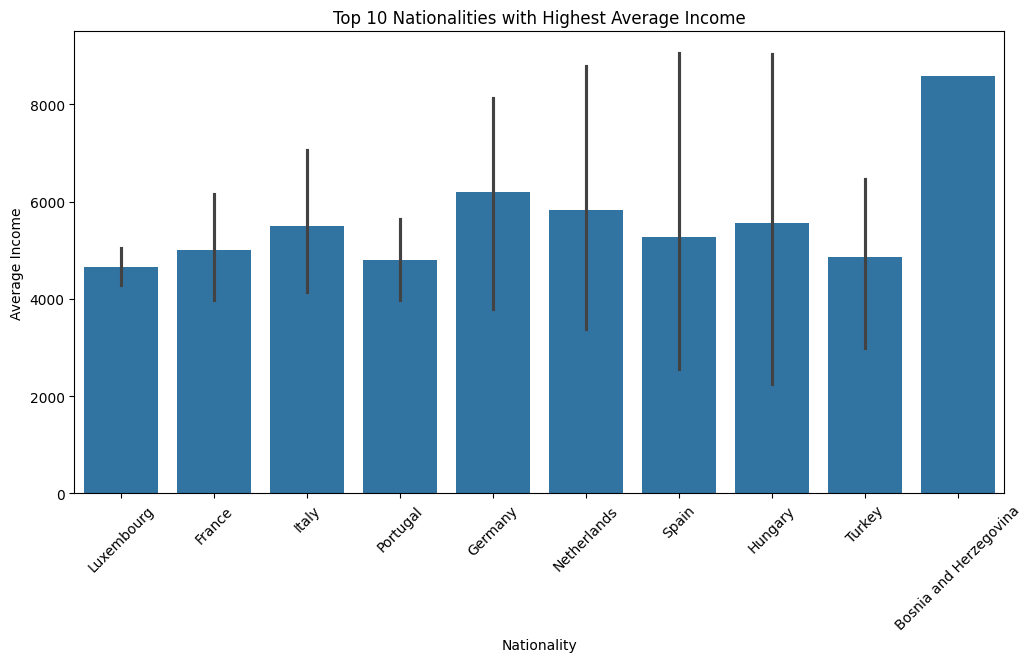

In [19]:
# 6.2. Top 10 Nationalities with Highest Average Income
# Calculate the average salary for each nationality
average_salary_by_nationality = data.groupby('Nationality')['Salary'].mean()

# Sort the nationalities by average salary and select the top 10
top_10_nationalities = average_salary_by_nationality.sort_values(ascending=False).head(10)

# Filter the original data to include only the top 10 nationalities
top_10_data = data[data['Nationality'].isin(top_10_nationalities.index)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_data['Nationality'], y=top_10_data['Salary'])

# Improve plot aesthetics
plt.title('Top 10 Nationalities with Highest Average Income')
plt.ylabel('Average Income')
plt.xlabel('Nationality')
plt.xticks(rotation=45)

plt.show()

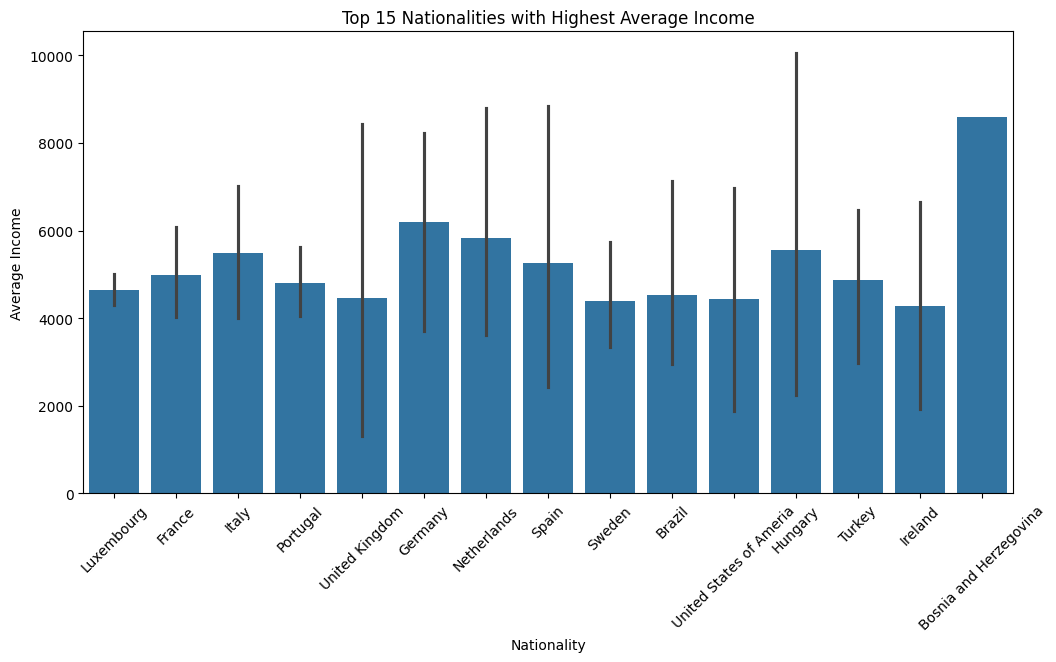

In [20]:
# 6.3. Top 15 Nationalities with Highest Average Income

# Calculate the average salary for each nationality
average_salary_by_nationality = data.groupby('Nationality')['Salary'].mean()

# Sort the nationalities by average salary and select the top 15
top_15_nationalities = average_salary_by_nationality.sort_values(ascending=False).head(15)

# Filter the original data to include only the top 15 nationalities
top_15_data = data[data['Nationality'].isin(top_15_nationalities.index)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_data['Nationality'], y=top_15_data['Salary'])

# Improve plot aesthetics
plt.title('Top 15 Nationalities with Highest Average Income')
plt.ylabel('Average Income')
plt.xlabel('Nationality')
plt.xticks(rotation=45)

plt.show()

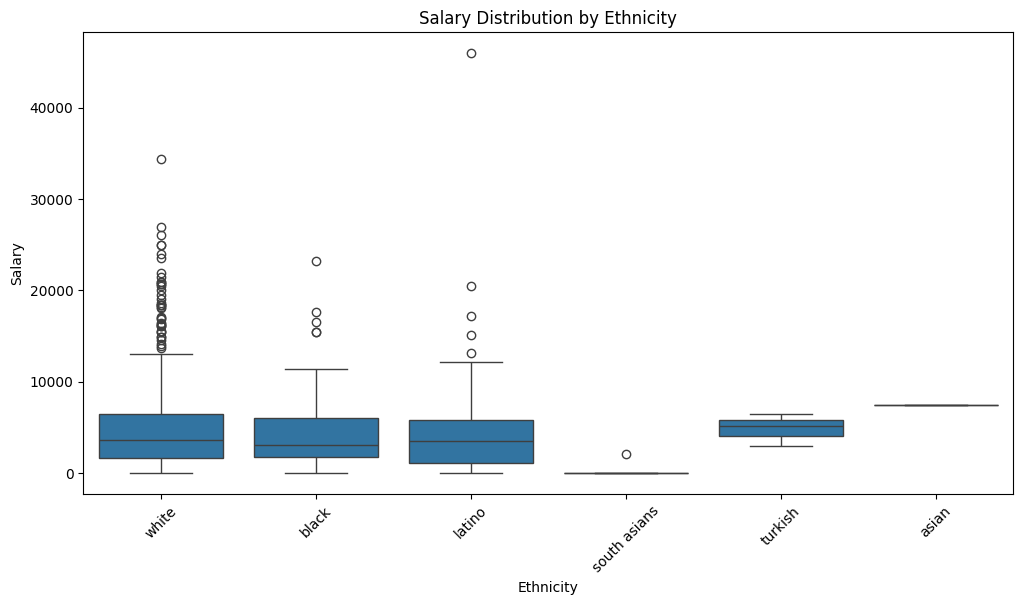

In [21]:
# 7. Salary Distribution by Ethnicity
# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ethnicity', y='Salary', data=data)

# Improve plot aesthetics
plt.xticks(rotation=45)
plt.title('Salary Distribution by Ethnicity')
plt.ylabel('Salary')
plt.xlabel('Ethnicity')
plt.show()

<Figure size 1200x600 with 0 Axes>

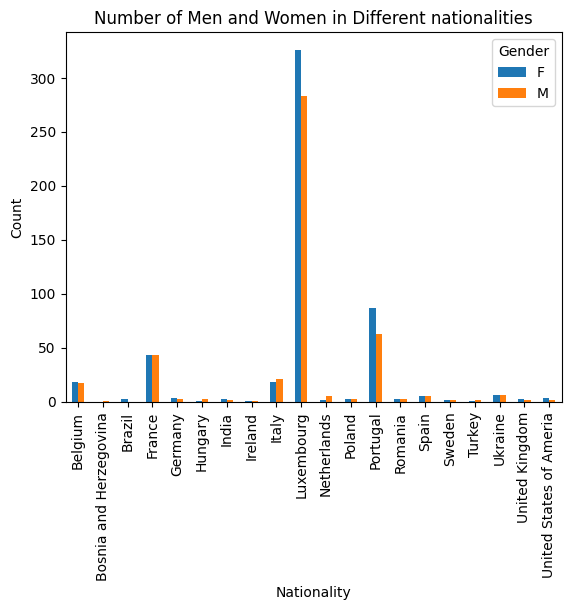

In [22]:
# 8. Number of Men and Women in Different nationalities
gender_count = data.groupby(['Nationality', 'Gender']).size().unstack()

# Plotting
plt.figure(figsize=(12, 6))
gender_count.plot(kind='bar', stacked=False)

# Improve plot aesthetics
plt.title('Number of Men and Women in Different nationalities')
plt.ylabel('Count')
plt.xlabel('Nationality')
plt.xticks(rotation=90)
plt.legend(title='Gender')

plt.show()

In [23]:
data.to_csv('exported_small.csv', index=False)

# Cantons exploration

In [24]:
unique_cantons = data['Canton'].nunique()
unique_cantons
unique_cantons_names = data['Canton'].unique()
unique_cantons_names

array(['Canton Luxembourg', 'Canton Esch', 'Canton Diekirch',
       'Canton Wiltz', 'Canton Capellen', 'Canton Vianden',
       'Canton Clervaux', 'Canton Echternach', 'Canton Remich',
       'Canton Mersch', 'Canton Grevenmacher', 'Canton Redange'],
      dtype=object)

In [25]:
unique_municipalities = data['Municipality'].nunique()
unique_mun_names = data['Municipality'].unique()
#unique_municipalities
unique_mun_names

array(['Schuttrange', 'Luxembourg', 'Pétange', 'Ettelbruck', 'Steinsel',
       "Vallée de l'Ernz", 'Kayl', 'Mondercange', 'Differdange',
       'Bertrange', 'Wiltz', 'Dudelange', 'Schieren', 'Mamer',
       'Walferdange', 'Esch-sur-Alzette', 'Vianden', 'Rumelange',
       'Käerjeng', 'Weiswampach', 'Schifflange', 'Feulen', 'Niederanven',
       'Waldbillig', 'Remich', 'Parc Hosingen', 'Bettembourg', 'Habscht',
       'Mersch', 'Sanem', 'Betzdorf', 'Wormeldange', 'Sandweiler',
       'Beckerich', 'Hesperange', 'Schengen', 'Echternach', 'Mertzig',
       'Weiler-la-Tour', 'Dalheim', 'Grevenmacher', 'Helperknapp',
       'Rosport-Mompach', 'Biwer', 'Troisvierges', 'Leudelange',
       'Junglinster', 'Beaufort', 'Préizerdaul', 'Frisange',
       'Lorentzweiler', 'Heffingen', 'Strassen', 'Wincrange', 'Steinfort',
       'Esch-sur-Sûre', 'Kehlen', 'Bourscheid', 'Mondorf-les-Bains',
       'Lenningen', 'Rambrouch', 'Manternach', 'Redange-sur-Attert',
       'Bissen', 'Tandel', 'Clervaux', 'C

### Importing the dataset with Lat & Lon for cities in Luxembourg

In [26]:
canton_capitals = pd.read_csv("lu.csv")
canton_capitals = canton_capitals.copy()

In [27]:
canton_capitals

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Luxembourg,49.6117,6.1319,Luxembourg,LU,Luxembourg,primary,132780.0,132780.0
1,Esch-sur-Alzette,49.4969,5.9806,Luxembourg,LU,Esch-sur-Alzette,admin,36228.0,36177.0
2,Dudelange,49.4833,6.0833,Luxembourg,LU,Esch-sur-Alzette,minor,21513.0,21513.0
3,Differdange,49.5222,5.8917,Luxembourg,LU,Esch-sur-Alzette,minor,15455.0,15455.0
4,Belvaux,49.5167,5.9333,Luxembourg,LU,Esch-sur-Alzette,NaN,7826.0,7826.0
...,...,...,...,...,...,...,...,...,...
275,Tandel,49.8970,6.1820,Luxembourg,LU,Vianden,minor,NaN,NaN
276,Esch-sur-Sûre,49.9110,5.9347,Luxembourg,LU,Wiltz,minor,NaN,NaN
277,Mompach,49.7461,6.4650,Luxembourg,LU,Echternach,minor,NaN,NaN
278,Winseler,49.9678,5.8903,Luxembourg,LU,Wiltz,minor,NaN,NaN


In [28]:
canton_capitals["admin_name"].unique()

array(['Luxembourg', 'Esch-sur-Alzette', 'Diekirch', 'Capellen',
       'Echternach', 'Wiltz', 'Remich', 'Grevenmacher', 'Vianden',
       'Mersch', 'Clervaux', 'Redange'], dtype=object)

In [29]:
canton_capitals["city"].unique()

array(['Luxembourg', 'Esch-sur-Alzette', 'Dudelange', 'Differdange',
       'Belvaux', 'Rodange', 'Niedercorn', 'Diekirch', 'Soleuvre',
       'Bascharage', 'Echternach', 'Kayl', 'Steinfort', 'Rumelange',
       'Wiltz', 'Mondorf-les-Bains', 'Grevenmacher', 'Frisange',
       'Obercorn', 'Béreldange', 'Tétange', 'Remich', 'Sandweiler',
       'Junglinster', 'Wasserbillig', 'Bridel', 'Lamadelaine',
       'Helmsange', 'Hesperange', 'Fentange', 'Itzig', 'Alzingen',
       'Vianden', 'Rollingen', 'Eischen', 'Schieren', 'Roodt-sur-Syre',
       'Capellen', 'Clemency', 'Heisdorf', 'Hautcharage', 'Hobscheid',
       'Gonderange', 'Larochette', 'Aspelt', 'Dalheim', 'Canach',
       'Schouweiler', 'Contern', 'Mertert', 'Crauthem', 'Bergem',
       'Clervaux', 'Warken', 'Berdorf', 'Medernach', 'Moutfort',
       'Weiswampach', 'Olm', 'Tuntange', 'Berchem', 'Koerich',
       'Bettendorf', 'Bettange-sur-Mess', 'Garnich', 'Heffingen',
       'Müllendorf', 'Hosingen', 'Pontpierre', 'Nospelt',
     

In [30]:
# Mapping from city to lat and lon
city_to_lat = canton_capitals.set_index('city')['lat'].to_dict()
city_to_lon = canton_capitals.set_index('city')['lng'].to_dict()

In [31]:
# Map lat and lon to each admin_name based on city
canton_capitals['admin_lat'] = canton_capitals['admin_name'].map(city_to_lat)
canton_capitals['admin_lon'] = canton_capitals['admin_name'].map(city_to_lon)

# Display the updated DataFrame
canton_capitals

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,admin_lat,admin_lon
0,Luxembourg,49.6117,6.1319,Luxembourg,LU,Luxembourg,primary,132780.0,132780.0,49.6117,6.1319
1,Esch-sur-Alzette,49.4969,5.9806,Luxembourg,LU,Esch-sur-Alzette,admin,36228.0,36177.0,49.4969,5.9806
2,Dudelange,49.4833,6.0833,Luxembourg,LU,Esch-sur-Alzette,minor,21513.0,21513.0,49.4969,5.9806
3,Differdange,49.5222,5.8917,Luxembourg,LU,Esch-sur-Alzette,minor,15455.0,15455.0,49.4969,5.9806
4,Belvaux,49.5167,5.9333,Luxembourg,LU,Esch-sur-Alzette,NaN,7826.0,7826.0,49.4969,5.9806
...,...,...,...,...,...,...,...,...,...,...,...
275,Tandel,49.8970,6.1820,Luxembourg,LU,Vianden,minor,NaN,NaN,49.9336,6.2075
276,Esch-sur-Sûre,49.9110,5.9347,Luxembourg,LU,Wiltz,minor,NaN,NaN,49.9667,5.9333
277,Mompach,49.7461,6.4650,Luxembourg,LU,Echternach,minor,NaN,NaN,49.8117,6.4217
278,Winseler,49.9678,5.8903,Luxembourg,LU,Wiltz,minor,NaN,NaN,49.9667,5.9333


In [32]:
# Check for NA in 'lat' and 'Lon' columns
na_in_lat = canton_capitals['admin_lat'].isna().any()
na_in_lon = canton_capitals['admin_lon'].isna().any()

# Print the results
print(f"Are there any NA values in the 'lat' column? {na_in_lat}")
print(f"Are there any NA values in the 'Lon' column? {na_in_lon}")

Are there any NA values in the 'lat' column? True
Are there any NA values in the 'Lon' column? True


In [33]:
na_rows = canton_capitals[canton_capitals['admin_lat'].isna() | canton_capitals['admin_lon'].isna()]
na_rows

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,admin_lat,admin_lon
78,Grosbous,49.8333,5.9667,Luxembourg,LU,Redange,minor,991.0,991.0,NaN,NaN
85,Perlé,49.8167,5.7667,Luxembourg,LU,Redange,NaN,883.0,883.0,NaN,NaN
90,Beckerich,49.7306,5.8833,Luxembourg,LU,Redange,minor,834.0,834.0,NaN,NaN
124,Noerdange,49.7500,5.9333,Luxembourg,LU,Redange,NaN,599.0,599.0,NaN,NaN
127,Bigonville,49.8500,5.8000,Luxembourg,LU,Redange,NaN,546.0,546.0,NaN,NaN
131,Pratz,49.8000,5.9333,Luxembourg,LU,Redange,NaN,533.0,533.0,NaN,NaN
132,Everlange,49.7667,5.9500,Luxembourg,LU,Redange,NaN,533.0,533.0,NaN,NaN
136,Rambrouch,49.8299,5.8498,Luxembourg,LU,Redange,minor,528.0,528.0,NaN,NaN
137,Platen,49.7833,5.9333,Luxembourg,LU,Redange,NaN,521.0,521.0,NaN,NaN
139,Ell,49.7667,5.8500,Luxembourg,LU,Redange,minor,515.0,515.0,NaN,NaN


In [34]:
# Find the lat and Lon for "Redange-sur-Attert"
redange_lat = canton_capitals.loc[canton_capitals['city'] == 'Redange-sur-Attert', 'lat'].iloc[0]
redange_lon = canton_capitals.loc[canton_capitals['city'] == 'Redange-sur-Attert', 'lng'].iloc[0]

# Update the lat and Lon for "Redange"
canton_capitals.loc[canton_capitals['admin_name'] == 'Redange', 'admin_lat'] = redange_lat
canton_capitals.loc[canton_capitals['admin_name'] == 'Redange', 'admin_lon'] = redange_lon

In [35]:
# Check for NA in 'lat' and 'Lon' columns
na_in_lat = canton_capitals['admin_lat'].isna().any()
na_in_lon = canton_capitals['admin_lon'].isna().any()

# Print the results
print(f"Are there any NA values in the 'lat' column? {na_in_lat}")
print(f"Are there any NA values in the 'Lon' column? {na_in_lon}")

Are there any NA values in the 'lat' column? False
Are there any NA values in the 'Lon' column? False


In [36]:
canton_capitals['admin_name'].unique()

array(['Luxembourg', 'Esch-sur-Alzette', 'Diekirch', 'Capellen',
       'Echternach', 'Wiltz', 'Remich', 'Grevenmacher', 'Vianden',
       'Mersch', 'Clervaux', 'Redange'], dtype=object)

In [37]:
canton_capitals['admin_name'] = canton_capitals['admin_name'].str.replace('-sur-Alzette', '')

In [38]:
canton_capitals['admin_name'].unique()

array(['Luxembourg', 'Esch', 'Diekirch', 'Capellen', 'Echternach',
       'Wiltz', 'Remich', 'Grevenmacher', 'Vianden', 'Mersch', 'Clervaux',
       'Redange'], dtype=object)

In [39]:
canton_capitals

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,admin_lat,admin_lon
0,Luxembourg,49.6117,6.1319,Luxembourg,LU,Luxembourg,primary,132780.0,132780.0,49.6117,6.1319
1,Esch-sur-Alzette,49.4969,5.9806,Luxembourg,LU,Esch,admin,36228.0,36177.0,49.4969,5.9806
2,Dudelange,49.4833,6.0833,Luxembourg,LU,Esch,minor,21513.0,21513.0,49.4969,5.9806
3,Differdange,49.5222,5.8917,Luxembourg,LU,Esch,minor,15455.0,15455.0,49.4969,5.9806
4,Belvaux,49.5167,5.9333,Luxembourg,LU,Esch,NaN,7826.0,7826.0,49.4969,5.9806
...,...,...,...,...,...,...,...,...,...,...,...
275,Tandel,49.8970,6.1820,Luxembourg,LU,Vianden,minor,NaN,NaN,49.9336,6.2075
276,Esch-sur-Sûre,49.9110,5.9347,Luxembourg,LU,Wiltz,minor,NaN,NaN,49.9667,5.9333
277,Mompach,49.7461,6.4650,Luxembourg,LU,Echternach,minor,NaN,NaN,49.8117,6.4217
278,Winseler,49.9678,5.8903,Luxembourg,LU,Wiltz,minor,NaN,NaN,49.9667,5.9333


In [44]:
### Confused with the steps, so the solution is awkward
admin_name_to_lat = canton_capitals.groupby('admin_name')['admin_lat'].first().to_dict()
admin_name_to_lon = canton_capitals.groupby('admin_name')['admin_lon'].first().to_dict()

In [45]:
admin_name_to_lat

{'Capellen': 49.6444,
 'Clervaux': 50.05,
 'Diekirch': 49.8681,
 'Echternach': 49.8117,
 'Esch': 49.4969,
 'Grevenmacher': 49.6806,
 'Luxembourg': 49.6117,
 'Mersch': 49.75,
 'Redange': 49.7652,
 'Remich': 49.5444,
 'Vianden': 49.9336,
 'Wiltz': 49.9667}

### Coming back to the synthetic data

In [49]:
data

,Gender,Age,Nationality,Municipality,Canton,Salary,Ethnicity,Surname,admin_name,admin_lat,admin_lon
0,M,43,Luxembourg,Schuttrange,Canton Luxembourg,26044.0,white,Smits,Luxembourg,49.6117,6.1319
1,F,38,Belgium,Luxembourg,Canton Luxembourg,2960.0,white,Heymans,Luxembourg,49.6117,6.1319
2,M,33,Luxembourg,Pétange,Canton Esch,6528.0,white,Vercruysse,Esch,49.4969,5.9806
3,F,27,France,Ettelbruck,Canton Diekirch,4862.0,white,Bonneau,Diekirch,49.8681,6.1567
4,F,79,Luxembourg,Steinsel,Canton Luxembourg,0.0,white,Étienne,Luxembourg,49.6117,6.1319
...,...,...,...,...,...,...,...,...,...,...,...
995,F,36,Luxembourg,Sandweiler,Canton Luxembourg,8083.0,latino,Verstraeten,Luxembourg,49.6117,6.1319
996,F,31,Luxembourg,Wiltz,Canton Wiltz,3333.0,white,Neyens,Wiltz,49.9667,5.9333
997,F,65,Luxembourg,Erpeldange-sur-Sûre,Canton Diekirch,0.0,latino,Weber,Diekirch,49.8681,6.1567
998,F,67,Luxembourg,Luxembourg,Canton Luxembourg,0.0,latino,Lopes,Luxembourg,49.6117,6.1319


In [47]:
data['admin_name'] = data["Canton"].str.replace('Canton ', '')

In [48]:
data['admin_lat'] = data['admin_name'].map(admin_name_to_lat)
data['admin_lon'] = data['admin_name'].map(admin_name_to_lon)

### Exporting

In [50]:
data.to_csv('exported_small_withlatlon.csv', index=False)

In [51]:
data.columns

Index(['Gender', 'Age', 'Nationality', 'Municipality', 'Canton', 'Salary',
       'Ethnicity', 'Surname', 'admin_name', 'admin_lat', 'admin_lon'],
      dtype='object')

# New DF for visualizations

In [89]:
data[data["admin_name"] == "Vianden"]

,Gender,Age,Nationality,Municipality,Canton,Salary,Ethnicity,Surname,admin_name,admin_lat,admin_lon
21,F,53,Luxembourg,Vianden,Canton Vianden,2539.0,white,Marchal,Vianden,49.9336,6.2075
173,F,26,Luxembourg,Tandel,Canton Vianden,3153.0,black,Bouvet,Vianden,49.9336,6.2075
472,M,52,Luxembourg,Vianden,Canton Vianden,4039.0,white,Lefebvre,Vianden,49.9336,6.2075
708,F,22,Luxembourg,Vianden,Canton Vianden,4539.0,white,Valentin,Vianden,49.9336,6.2075
848,F,44,Luxembourg,Vianden,Canton Vianden,3539.0,white,Dumont,Vianden,49.9336,6.2075
895,M,22,Luxembourg,Vianden,Canton Vianden,4039.0,white,Vermeulen,Vianden,49.9336,6.2075


In [56]:
# Proportion of women in each canton
women_proportion = df[df['Gender'] == 'F'].groupby('admin_name').size() / df.groupby('admin_name').size()

# Proportion of people over 65 in each canton
over_65_proportion = df[df['Age'] > 65].groupby('admin_name').size() / df.groupby('admin_name').size()

# Average salary for each canton
average_salary = df.groupby('admin_name')['Salary'].mean()

In [52]:
df = data.copy()

In [58]:
average_salary

admin_name
Capellen        6584.268293
Clervaux        3257.060606
Diekirch        3933.058824
Echternach      3440.100000
Esch            3803.301948
Grevenmacher    4176.145833
Luxembourg      5764.809524
Mersch          4559.160000
Redange         3169.863636
Remich          4450.694444
Vianden         3641.333333
Wiltz           4309.352941
Name: Salary, dtype: float64

In [61]:
# Proportion of women in each canton
women_proportion = df[df['Gender'] == 'F'].groupby('admin_name').size() / df.groupby('admin_name').size()

# Proportion of people over 65 in each canton
over_65_proportion = df[df['Age'] > 65].groupby('admin_name').size() / df.groupby('admin_name').size()

# Average salary for each canton
average_salary = df.groupby('admin_name')['Salary'].mean()

# Creating a new DataFrame with calculated values
final_data = { 'admin_name': ("Capellen", "Clervaux", "Diekirch", "Echternach", "Esch", "Grevenmacher", "Luxembourg", 
                          "Mersch", "Redange", "Remich", "Vianden", "Wiltz"),
    'WomenProportion': women_proportion,
    'Over65Proportion': over_65_proportion,
    'AverageSalary': average_salary
}
final_df = pd.DataFrame(final_data)

In [62]:
final_df['admin_lat'] = final_df['admin_name'].map(admin_name_to_lat)
final_df['admin_lon'] = final_df['admin_name'].map(admin_name_to_lon)

In [80]:
final_df

,admin_name,WomenProportion,Over65Proportion,AverageSalary,admin_lat,admin_lon,WomenProportionScaled,Over65ProportionScaled
admin_name,,,,,,,,
Capellen,Capellen,0.512195,0.109756,6584.268293,49.6444,5.9897,51.219512,10.975610
Clervaux,Clervaux,0.424242,0.121212,3257.060606,50.0500,6.0333,42.424242,12.121212
Diekirch,Diekirch,0.529412,0.156863,3933.058824,49.8681,6.1567,52.941176,15.686275
Echternach,Echternach,0.400000,0.200000,3440.100000,49.8117,6.4217,40.000000,20.000000
Esch,Esch,0.525974,0.165584,3803.301948,49.4969,5.9806,52.597403,16.558442
Grevenmacher,Grevenmacher,0.604167,0.166667,4176.145833,49.6806,6.4417,60.416667,16.666667
Luxembourg,Luxembourg,0.574830,0.173469,5764.809524,49.6117,6.1319,57.482993,17.346939
Mersch,Mersch,0.540000,0.160000,4559.160000,49.7500,6.1000,54.000000,16.000000
Redange,Redange,0.464286,0.214286,3169.863636,49.7652,5.8894,46.428571,21.428571


In [84]:
final_df["WomenProportionScaled"] = final_df["WomenProportion"] * 10000
final_df["Over65ProportionScaled"] = final_df["Over65Proportion"] *10000

In [85]:
final_df.to_csv('exported_small_withlatlon_proportions.csv', index=False)

In [68]:
final_df["WomenProportion"]

admin_name
Capellen        0.512195
Clervaux        0.424242
Diekirch        0.529412
Echternach      0.400000
Esch            0.525974
Grevenmacher    0.604167
Luxembourg      0.574830
Mersch          0.540000
Redange         0.464286
Remich          0.444444
Vianden         0.666667
Wiltz           0.529412
Name: WomenProportion, dtype: float64

# other

### Scraping the dataset with cantons and their capitals

In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [13]:
url = 'https://en.wikipedia.org/wiki/Cantons_of_Luxembourg'

In [14]:
response = requests.get(url)
response

<Response [200]>

In [15]:
soup = BeautifulSoup(response.content, 'html.parser')

In [16]:
#soup

In [17]:
indiatable=soup.find('table', {'class':"wikitable sortable"})

In [18]:
#indiatable

In [19]:
cantons=pd.read_html(str(indiatable))
# convert list to dataframe
df_cantons=pd.DataFrame(cantons[0])
df_cantons

,Name,Luxembourgish name,Capital,Electoral district,Coat of arms[1]
0,Clervaux,Klierf,Clervaux,North,NaN
1,Wiltz,Wolz,Wiltz,North,NaN
2,Vianden,Veianen,Vianden,North,NaN
3,Redange,Réiden,Redange,North,NaN
4,Diekirch,Dikrech,Diekirch,North,NaN
5,Mersch,Miersch,Mersch,Centre,NaN
6,Echternach,Iechternach,Echternach,East,NaN
7,Capellen,Kapellen,Mamer,South,NaN
8,Luxembourg,Lëtzebuerg,Luxembourg City,Centre,NaN
9,Grevenmacher,Gréiwemaacher,Grevenmacher,East,NaN


### Updating the synthetic dataframe